In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
import random
from tqdm import tqdm

In [2]:
env = gym.make("CartPole-v1")

In [3]:
def MAX(state):
    list = np.array([Q[state,a] for a in range(2)])
    best_action = np.argmax(list)
    return best_action

def DiscretizeSpace(obs):
    cartX,cartV,poleTheta,poleThetaV = obs
    cartX = np.digitize(cartX, cartPosSpace)
    cartV = np.digitize(cartV, cartVelSpace)
    poleTheta = np.digitize(poleTheta, poleThetaSpace)
    poleThetaV = np.digitize(poleThetaV,poleThetaVelSpace)
    return (cartX,cartV,poleTheta,poleThetaV)

cartPosSpace = np.linspace(-2.4,2.4,10)
cartVelSpace = np.linspace(-4,4,10)
poleThetaSpace = np.linspace(-.2095,.2095,20)
poleThetaVelSpace = np.linspace(-5,5,10)

In [4]:
states = []
for i in range(len(cartPosSpace) + 1):
    for j in range(len(cartVelSpace) + 1):
        for k in range(len(poleThetaSpace) + 1):
            for l in range(len(poleThetaVelSpace) + 1):
                states.append((i, j, k, l))

policy = {key:random.randint(0,1) for key in states}
Q = {(state,a):np.random.uniform() for state in states for a in range(0,env.action_space.n,1)}

In [5]:
ALPHA = 0.1
EPS = 1
GAMMA = 0.95
num_episodes = 80000

100%|██████████| 50000/50000 [06:33<00:00, 126.92it/s]


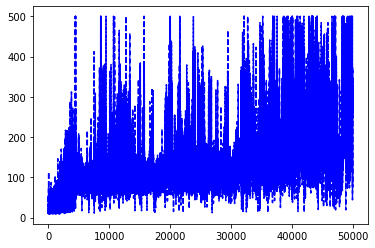

In [6]:
ALPHA = 0.1
EPS = 1
GAMMA = 0.95
num_episodes = 50000
totalReward = np.zeros(num_episodes)
for i in tqdm(range(num_episodes)):
    obs = env.reset()
    obs = DiscretizeSpace(obs)
    epsReward = 0
    done = False
    while not done:
        action = MAX(obs) if np.random.random() > EPS else env.action_space.sample()
        obs_,R,done,info = env.step(action)
        epsReward += R
        obs_ = DiscretizeSpace(obs_)
        Q[obs,action] = Q[obs,action] + ALPHA*(R+GAMMA*Q[obs_,MAX(obs_)]-Q[obs,action])
        obs = obs_
    totalReward[i] = epsReward
    EPS -= 1 / (5000) if EPS > 0.05 else 0


plt.plot(totalReward, 'b--')
plt.show()

100%|██████████| 50000/50000 [15:11<00:00, 54.87it/s] 


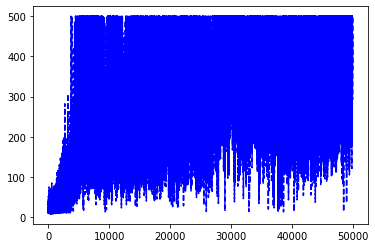

In [7]:
policy = {key:random.randint(0,1) for key in states}
Q = {(state,a):np.random.uniform() for state in states for a in range(0,env.action_space.n,1)}
ALPHA = 0.1
EPS = 1
GAMMA = 0.95
num_episodes = 50000
totalReward = np.zeros(num_episodes)
for i in tqdm(range(num_episodes)):
    obs = env.reset()
    obs = DiscretizeSpace(obs)
    epsReward = 0
    done = False
    while not done:
        action = MAX(obs) if np.random.random() > EPS else env.action_space.sample()
        obs_,R,done,info = env.step(action)
        epsReward += R
        obs_ = DiscretizeSpace(obs_)
        rand = np.random.random()
        a_ = MAX(obs_) if rand < (1-EPS) else env.action_space.sample()
        Q[obs,action] = Q[obs,action] + ALPHA*(R+GAMMA*Q[obs_,MAX(obs_)]-Q[obs,action])
        obs = obs_
    totalReward[i] = epsReward
    EPS -= 1 / (5000) if EPS > 0.05 else 0


plt.plot(totalReward, 'b--')
plt.show()

In [8]:
#Updating Policy
for state in states:
    policy[state] = MAX(state)

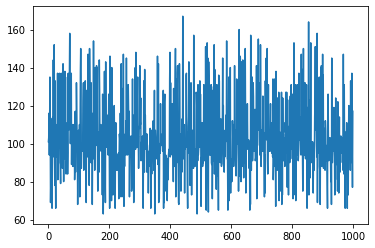

In [9]:
#Testing new Policy performance
num_episodes = 1000
totalReward = np.zeros(num_episodes)
for i in range(num_episodes):
    epsReward = 0
    obs = env.reset()
    obs = DiscretizeSpace(obs)
    done = False
    while not done:
        action = policy[obs]
        obs, R, done, info = env.step(action)
        obs = DiscretizeSpace(obs)
        epsReward += R
    totalReward[i] = epsReward

plt.plot(totalReward)
plt.show()

In [1]:
for i in range(num_episodes):
    epsReward = 0
    obs = env.reset()
    obs = DiscretizeSpace(obs)
    done = False
    while not done:
        action = policy[obs]
        obs, R, done, info = env.step(action)
        obs = DiscretizeSpace(obs)
        env.render()

NameError: name 'num_episodes' is not defined